<a href="https://colab.research.google.com/github/c-carrascos/math/blob/main/PRACTICA_GRAFOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2. Grafos

## Práctica 2.1
**Algoritmo de Dijkstra**

1. Mira estos vídeos:
 * [Algoritmo de DIJKSTRA ruta corta](https://youtu.be/6rl0ghgPfK0)
 * [Ruta mas corta en una red, algoritmo de Dijkstra](https://youtu.be/rh02c7v3EKY)
2. ¿Qué utilidad tiene el algoritmo?
3. Explique el algoritmo.
4. De un ejemplo de un grafo resuelto con el algoritmo de Dijkstra.
* Muestre la imagen del grafo con sus:
  - nodos
  - aristas (con flecha si son orientadas)
  - pesos (distancias o costes)
* Muestre nuevamente la imagen del grafo pero en esta ocasión con la solución.

**SOLUCIÓN**
2. Sirve para encontrar el camino de coste mínimo desde un vértice origen a todos los demás vértices del grafo.
3. Consiste en ir explorando todos los caminos más cortos que parten del vértice origen y que llevan a todos los demás vértices, cuando se obtiene el camino más corto desde el vértice origen hasta el resto de vértices que componen el grafo, el algoritmo se detiene.
4.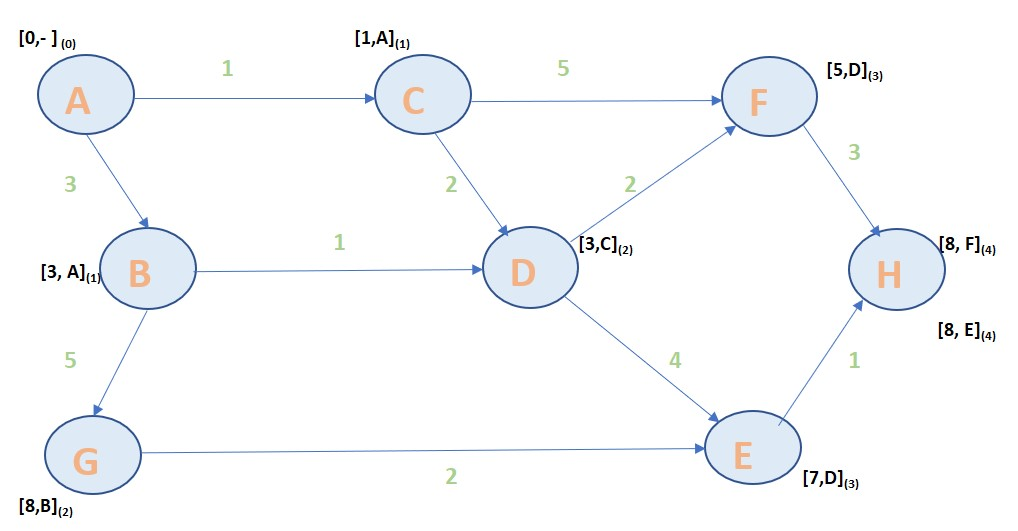

## Práctica 2.2
Vea el video:

* [Camino mas corto Solver](https://youtu.be/LYeMWlTfOgA)

Se pide:  
1. Replique en un archivo de Excel el caso del vídeo, en la Hoja 1. En el método de resolución de Solver elija el método Simplex.
2. En la Hoja 2, aplique esa metodología usando Solver a otro grafo de su invención. Dibuje el grafo, con sus nodos, flechas y pesos, y resuélvalo.
3. Suba el archivo de Excel creado a la tarea del Aula Virtual.

**GRAFO:**
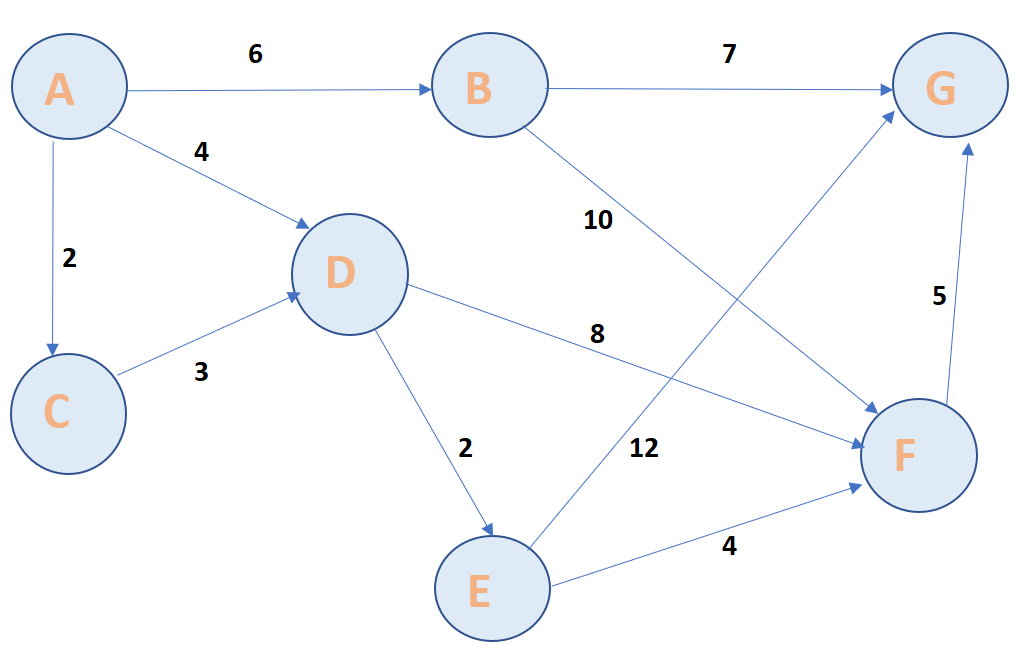

## Práctica 2.3
1. Muestre el enlace a alguna página donde se de el algoritmo de Dijkstra programado en **Python**.
2. Pruebe su código con algún grafo de ejemplo.

https://www.techiedelight.com/es/single-source-shortest-paths-dijkstras-algorithm/

In [8]:
import sys
from heapq import heappop, heappush
 
 
# Una clase para almacenar un nodo de heap
class Node:
    def __init__(self, vertex, weight=0):
        self.vertex = vertex
        self.weight = weight
 
    # Anule la función __lt__() para hacer que la clase `Node` funcione con un min-heap
    def __lt__(self, other):
        return self.weight < other.weight
 
 
# Una clase para representar un objeto graph
class Graph:
    def __init__(self, edges, n):
        # asigna memoria para la lista de adyacencia
        self.adjList = [[] for _ in range(n)]
 
        # agrega bordes al graph dirigido
        for (source, dest, weight) in edges:
            self.adjList[source].append((dest, weight))
 
 
def get_route(prev, i, route):
    if i >= 0:
        get_route(prev, prev[i], route)
        route.append(i)
 
 
# Ejecutar el algoritmo de Dijkstra en un graph dado
def findShortestPaths(graph, source, n):
 
    # crea un min-heap y empuja el nodo de origen con una distancia de 0
    pq = []
    heappush(pq, Node(source))
 
    # establece la distancia inicial desde la fuente a `v` como infinito
    dist = [sys.maxsize] * n
 
    # distancia de la fuente a sí mismo es cero
    dist[source] = 0
 
    # Lista # para rastrear vértices para los cuales ya se encontró el costo mínimo
    done = [False] * n
    done[source] = True
 
    # almacena el predecesor de un vértice (en una ruta de impresión)
    prev = [-1] * n
 
    # se ejecuta hasta que el min-heap esté vacío
    while pq:
 
        node = heappop(pq)      # Quitar y devolver el mejor vértice
        u = node.vertex         # obtener el número de vértice
 
        # hacer para cada vecino `v` de `u`
        for (v, weight) in graph.adjList[u]:
            if not done[v] and (dist[u] + weight) < dist[v]:        # Escalón de relajación
                dist[v] = dist[u] + weight
                prev[v] = u
                heappush(pq, Node(v, dist[v]))
 
        # marca el vértice `u` como hecho para que no se vuelva a recoger
        done[u] = True
 
    route = []
    for i in range(n):
        if i != source and dist[i] != sys.maxsize:
            get_route(prev, i, route)
            print(f'Path ({source} —> {i}): Minimum cost = {dist[i]}, Route = {route}')
            route.clear()
 
 
if __name__ == '__main__':
 
    # inicializa los bordes según el diagrama anterior
    # (u, v, w) representa la arista del vértice `u` al vértice `v` con peso `w`
    edges = [(0, 1, 10), (0, 4, 3), (1, 2, 2), (1, 4, 4), (2, 3, 9), (3, 2, 7),
            (4, 1, 1), (4, 2, 8), (4, 3, 2)]
 
    # número total de nodos en el graph (etiquetados de 0 a 4)
    n = 5
 
    # graph de construcción
    graph = Graph(edges, n)
 
    # ejecuta el algoritmo de Dijkstra desde cada nodo
    for source in range(n):
        findShortestPaths(graph, source, n)

Path (0 —> 1): Minimum cost = 4, Route = [0, 4, 1]
Path (0 —> 2): Minimum cost = 6, Route = [0, 4, 1, 2]
Path (0 —> 3): Minimum cost = 5, Route = [0, 4, 3]
Path (0 —> 4): Minimum cost = 3, Route = [0, 4]
Path (1 —> 2): Minimum cost = 2, Route = [1, 2]
Path (1 —> 3): Minimum cost = 6, Route = [1, 4, 3]
Path (1 —> 4): Minimum cost = 4, Route = [1, 4]
Path (2 —> 3): Minimum cost = 9, Route = [2, 3]
Path (3 —> 2): Minimum cost = 7, Route = [3, 2]
Path (4 —> 1): Minimum cost = 1, Route = [4, 1]
Path (4 —> 2): Minimum cost = 3, Route = [4, 1, 2]
Path (4 —> 3): Minimum cost = 2, Route = [4, 3]


## Práctica 2.4
* Dibuja un grafo que tenga un mínimo de 6 nodos
* Crea en **Python** su **matriz de adyacencia**
* Crea en Python su **lista de adyacencia**
* ¿Son cero todos los elementos de la diagonal principal?
 - En qué caso serían todos cero y en qué caso no.
* ¿Es una matriz simétrica?
 - En qué caso sería simétrica y en qué caso no.
* Usando Python, calcula el máximo de cada fila y el mínimo positivo de cada fila
 - ¿Qué significa ese mínimo positivo de cada fila?
* Suma todos los valores de la matriz
* Comprueba si funcionan bien o no los siguientes códigos:
 - El primero permite convertir una matriz de adyacencia en una lista de adyacencia.
 - El segundo permite convertir una lista de adyacencia en una matriz de adyacencia.
* Dibuja el grafo del ejemplo que se usa en este código.

In [ ]:
#matriz de adyacencia
m1 = [[0,1,1,0,1,0,0],
      [1,0,1,0,0,1,1],
      [1,1,0,1,0,0,0],
      [0,0,1,0,1,0,0],
      [1,0,0,1,0,1,0],
      [0,1,0,0,1,0,1],
      [0,1,0,0,0,1,0]]
print ("matriz de adyacencia:\n")
print(m1)

#lista de adyacencia

print ("\nlista adyacencia: \n A         BCE \n B         ACFG \n C         ABD \n D         CE \n E         ADF\n F         BEG\n G         BF\n")

#maximo de cada fila de la matriz
valores = []
for l in m1:
    maximo = max(l)
    minimo = min(l)
    valores.append((maximo,minimo))
print("Valor maximo y minimo de cada fila de la matriz:")
print(valores)

#suma valores de la matriz

elementos = 0
suma = 0
for fila in m1:
    for elemento in fila:
        suma += elemento
        elementos += 1
print ("\nLa suma de todos los elementos de la matriz es: ")
print(suma)

matriz de adyacencia:

[[0, 1, 1, 0, 1, 0, 0], [1, 0, 1, 0, 0, 1, 1], [1, 1, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0], [1, 0, 0, 1, 0, 1, 0], [0, 1, 0, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, 0]]

lista adyacencia: 
 A         BCE 
 B         ACFG 
 C         ABD 
 D         CE 
 E         ADF
 F         BEG
 G         BF

Valor maximo y minimo de cada fila de la matriz:
[(1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0)]

La suma de todos los elementos de la matriz es: 
20


* Sí, todos los elementos de la diagonal son ceros, esto ocurre cuando el grafo es simple.
* La matriz también es simétrica, esto se cumple cuando el grafo no está dirigido, es decir, sus vértices son bidireccionales.

**GRAFO DEL EJEMPLO:**
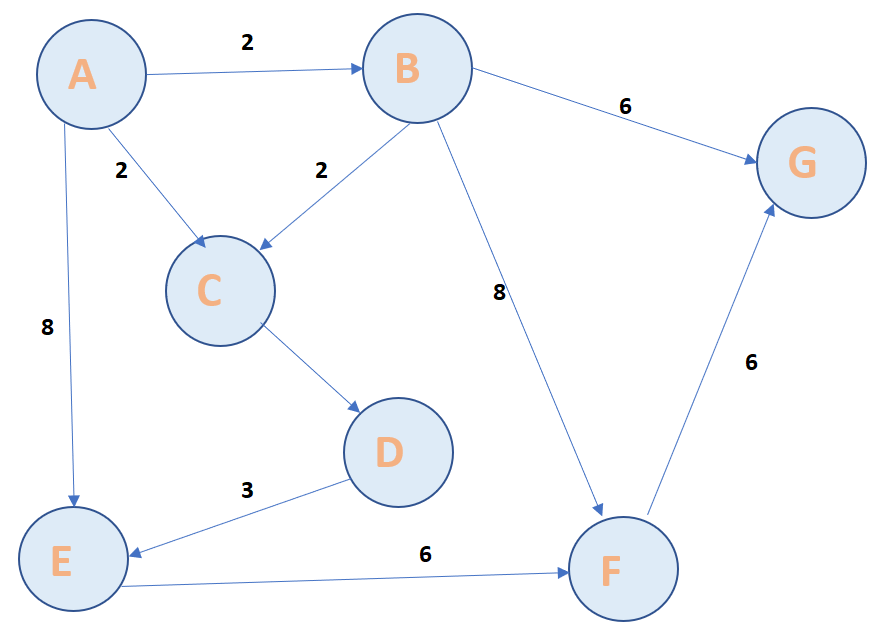

## Práctica 2.5
**Árboles binarios**
* Mira este vídeo: [¿Qué son los ÁRBOLES BINARIOS y por qué son tan geniales?](https://youtu.be/lMTaNbJAqvM)
* ¿Qué son los **árboles binarios de búsqueda**? (en inglés: BST (Binary Search Tree))
* Mira este vídeo: [Recorrido de Árboles Binarios](https://youtu.be/WCiwBrj8EQY)
* Qué significa recorrer el árbol en:
 - preorden
 - inorden
 - postorden
* Al BST del vídeo anterior añadele dos nodos de tu elección, de forma que continúe siendo un BST, dibujalo (poniendo en color azul claro los dos nodos nuevos) y da su recorrido en:
 - preorden
 - inorden (observa que en este caso los nodos deben quedar ordenados de menor a mayor)
 - postorden
* ¿Por qué los BST son importantes en ciencias de la computación?
* Pon un link a una página o vídeo que trate este tema en **Python**.
* ¿Has probado el código en Python que comentas? ¿Funciona con el BST que has puesto como ejemplo?

* Un árbol binario de búsqueda es un tipo particular de árbol binario que presenta una estructura de datos en forma de árbol usada en informática. El subnodo izquierdo de cualquier nodo no vacío contiene valores menores que dicho nodo y el subárbol derecho contiene valores mayores.
*Recorridos:
  * El recorrido preorden es: raíz, subárbol izquiero, subárbol derecho.
  * El recorrido inorden se recorre así: subárbol izquierdo, raíz, subárbol derecho.
  * El recorrido postorden: subárbol izquierdo, subárbol derecho, raíz.

#DIBUJO
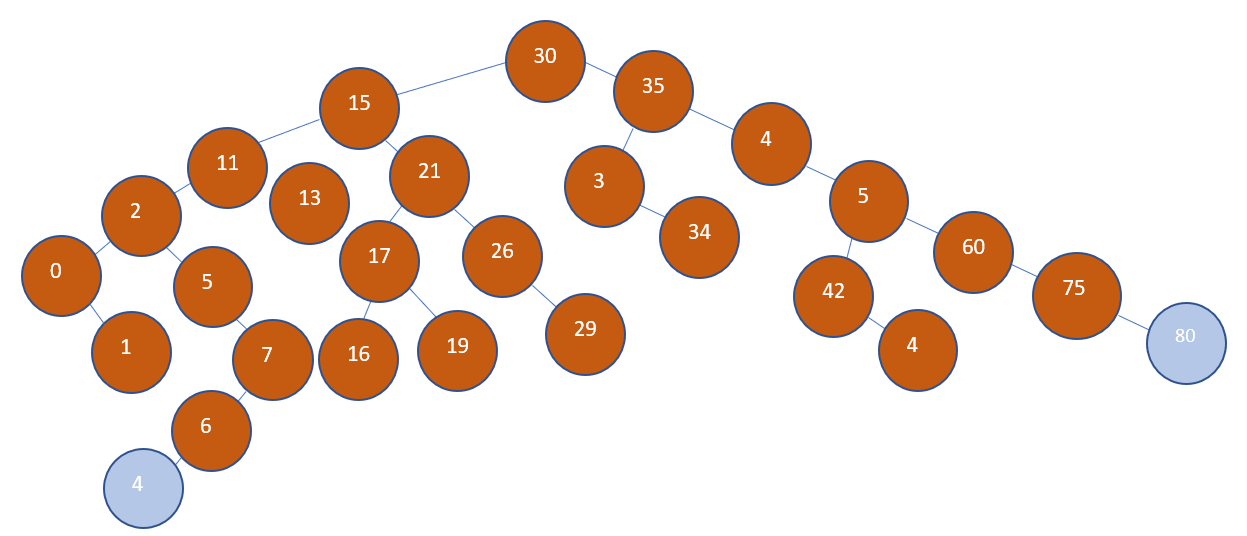
* Recorrido en preorden:
30, 15, 11, 2, 0, 1, 5, 7, 6, 4, 13, 21, 17, 16, 19, 26, 29, 35, 31, 34, 40, 50, 42, 45, 60, 75, 80.
* Recorrido en in orden:
0, 1, 2, 5, 4, 6, 7, 11, 13, 15, 16, 17, 19, 21, 26, 29, 30, 31, 34, 35, 40, 42, 45, 50, 60, 75, 80.
* Recorrido en post orden:
1, 0, 4, 6, 7, 5, 2, 13, 11, 16, 19, 17, 29, 26, 21, 15, 34, 31, 45, 42, 80, 75, 60, 50, 40, 35, 30.
* Los BTS son muy importantes en computación porque se emplean a menudo para la representación de expresiones aritméticas, dado que una operación con dos operandos la podemos representar como un árbol cuya raíz sea el operador, y sus subárboles sean los operandos.
* Link video árboles binarios en Python:
https://www.youtube.com/watch?v=d0ibZK_6Q7g
* Sí, funciona con el árbol del ejemplo.

## Práctica 2.6
* ¿Qué es un **camino hamiltoniano**?
* Pon un ejemplo
* Dibújalo
* Resulevelo
* ¿Qué utilidad tiene?
* Muestra los enlaces a par de vídeos que hablen de ello

* Un **camino hamiltoniano** es un camino que pasa por todos los vértices de un grafo, si además, empieza y acaba en el mismo vértice, entonces es un ciclo hamiltoniano.
* Ejemplo con el dibujo de abajo: un ciclo hamiltoniano sería: **ABCDA**
* Podemos aplicarlo a la resolución de algunos problemas, como el del viajante. Una persona tiene que recorrer varias ciudades, una vez cada una y empieza y termina en la suya.
* Enlaces de videos:

https://www.youtube.com/watch?v=ueE7IAfLmqk

https://www.youtube.com/watch?v=uWqp8rqY4Fs

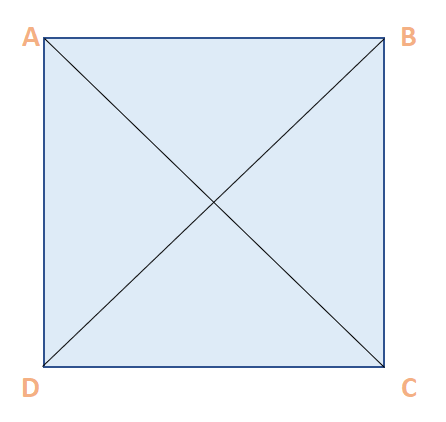

## Práctica 2.7
* Mira este vídeo:
 - [Un problema matemático de ciudades y carreteras](https://youtu.be/kwU1uIbylsM)
* Dibuja el grafo y da tu solución

**Solución:**

1-8-5-4-7-3-6-2-9-11-10


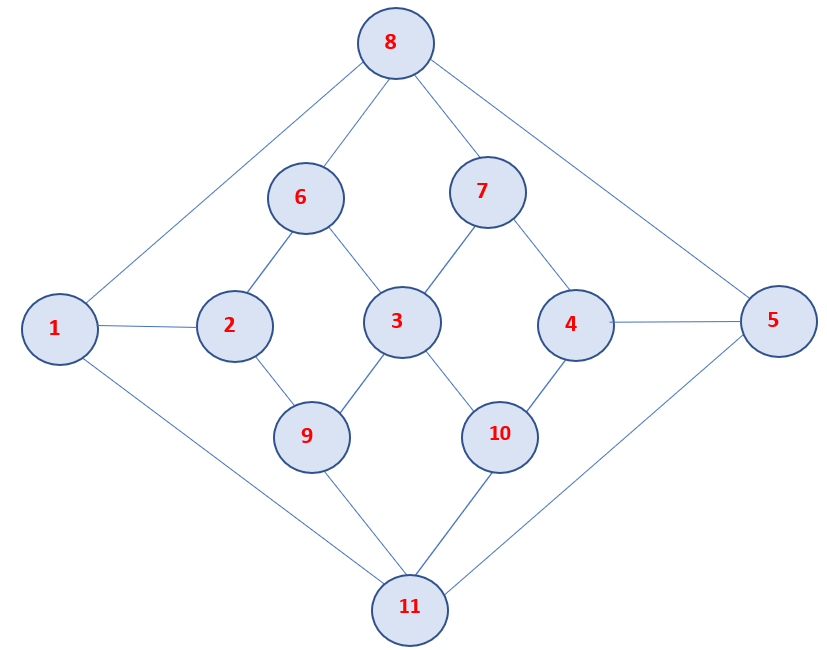

## Práctica 2.8
* El problema de **los puentes de Königsberg**
* Describe el problema
* Muestra una imagen del grafo resultante
* Quién fue *Euler* y qué hizo para resolver el problema

En en siglo XVIII, la ciudad de Königsberg, en Prusia, estaba dividida en cuatro zonas por el Rio Pregel. Estas regiones estaban comunicadas por siete puentes. Los habitantes de esta ciudad intentaban encontrar la forma de caminar por la ciudad pasando una sola vez por cada puente y regresando al lugar de partida.
* Euler llegó a la conclusión de que esto no era posible, lo demostró representando las cuatro regiones de la ciudad con cuatro vértices de un grafo y los vértices como aristas que unen estos puntos.
* Los vértices «intermedios» deben tener un número par de aristas, deben tener una vía para entrar y otra para salir. Sólo los puntos de inicio y salida pueden tener un número impar de aristas, porque nunca «entramos» al punto de inicio y nunca «salimos» del punto de llegada.

Tienes que salir una vez del punto de inicio (nº impar), entrar en un punto intermedio y salir de él (nº par) y acabar entrando en el punto de salida (nº impar).

* En el caso de los puentes, es imposible, ya que los vértices intermedios tienen un número impar de aristas, lo que nos obligaría a repetir algún puente.


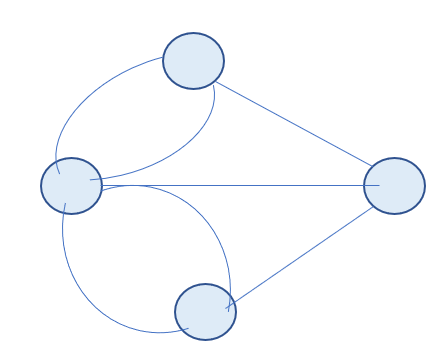

## Práctica 2.9
* ¿Qué son los **caminos eulerianos**?
* ¿Qué son los **ciclos eulerianos**?
* Da los enlaces a dos vídeos que hable de ello
* Dibuja un par de casos

* Un camino euleriano pasa por cada vértice al menos una vez y recorre cada arista sólo una vez.
* Un ciclo euleriano además, empieza y acaba en el mismo vértice.
* Vídeos:
    * https://www.youtube.com/watch?v=w8d-4FyrbYk
    * https://www.youtube.com/watch?v=57yhBHFCb7w
* En el primer grafo, el ciclo euleriano es: ABCA
* En el segundo grafo: ABCEFCA

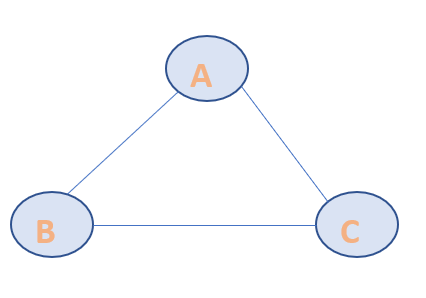
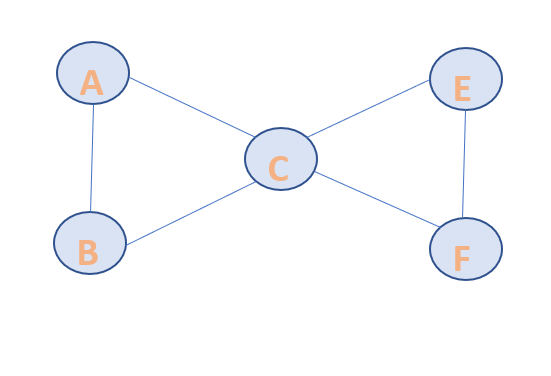

## Práctica 2.10
* Mira estos vídeos:
 - [¿Puedes dibujarlo sin despegar el lápiz?](https://youtu.be/IZ0-xFrlvag)
 - [USA esta LÓGICA cuando NO PUEDAS con un PROBLEMA](https://youtu.be/5Ncb7eU0LkQ)
* Caso 1: dibuja un grafo en el que si sea posible y resuélvelo
* Caso 2: dibuja un grafo en el que no sea posible y di el motivo

* Caso 1: recorrido: A, C, F, E, C, B

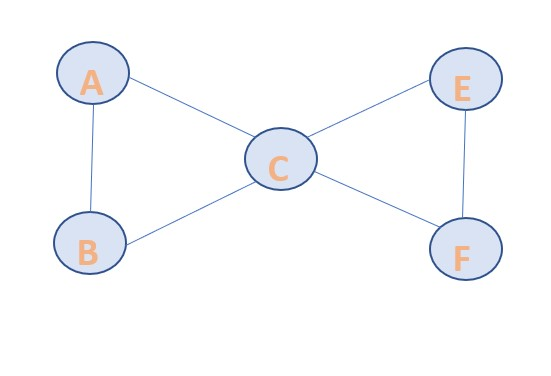
* Caso 2: no es posible porque para que tenga solución, el grafo debe tener máximo dos vértices con un número impar de aristas.
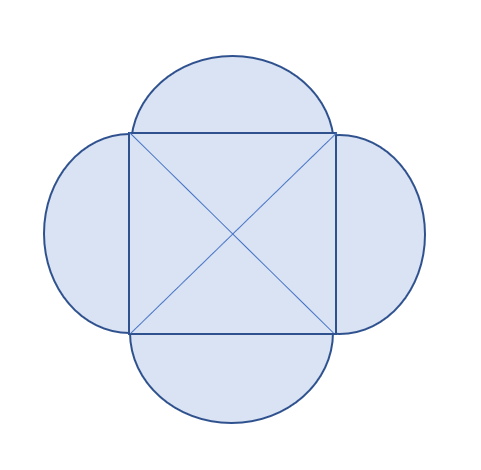